In [2]:
import sys
import pandas as pd
import numpy as np
import sqlite3 as db
import time
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
print("Python version: {}".format(sys.version))
print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("sqlite3 version: {}".format(db.version))


Python version: 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
pandas version: 0.25.1
numpy version: 1.16.5
sqlite3 version: 2.6.0


In [3]:
from sklearn import metrics

start = time.time()
end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))


In [4]:
df=pd.read_csv('cityforML5top.csv', header=0)

In [3]:
df.shape

(35027, 27)

In [4]:
df.columns

Index(['Incident Type', 'Report Hour of Day', 'Report Day of Week',
       'Offense Hour of Day', 'Offense Day of Week', 'Latitude', 'Longitude',
       'Zip Code Boundaries', '2010 Census Tracts',
       'Gainesville Police Districts', 'Florida Census Zip Codes',
       'Gainesville Fire Response Districts', 'OffenseDate', 'ReportDate',
       'ODate', 'DOhour', 'DOmonth', 'RDate', 'DRhour', 'DRmonth', 'Oyear',
       'Omonth', 'Oday', 'Ryear', 'Rmonth', 'Rday', 'delay'],
      dtype='object')

In [5]:
df.shape

(35027, 27)

In [5]:
set(df['Report Day of Week'])

{1, 2, 3, 4, 5, 6, 7}

In [7]:
df.head()

,Incident Type,Report Hour of Day,Report Day of Week,Offense Hour of Day,Offense Day of Week,Latitude,Longitude,Zip Code Boundaries,2010 Census Tracts,Gainesville Police Districts,...,RDate,DRhour,DRmonth,Oyear,Omonth,Oday,Ryear,Rmonth,Rday,delay
0,Theft Petit - Retail,19,5,17,5,29.673875,-82.319950,4.0,12.0,4.0,...,2020-02-14,2020-02-14 19,2020-02,2020,2,14,2020,2,14,0
1,Theft Petit - Retail,16,5,0,6,29.661941,-82.300747,9.0,14.0,2.0,...,2020-02-14,2020-02-14 16,2020-02,2020,1,11,2020,2,14,33
2,Theft Petit - Other,9,3,12,2,29.646612,-82.292538,9.0,14.0,2.0,...,2019-12-04,2019-12-04 09,2019-12,2019,11,26,2019,12,4,8
3,Theft Petit - Retail,10,3,10,3,29.624934,-82.377930,2.0,32.0,12.0,...,2019-12-04,2019-12-04 10,2019-12,2019,12,4,2019,12,4,0
4,Theft Petit - Retail,10,3,10,3,29.661941,-82.300747,9.0,14.0,2.0,...,2019-12-04,2019-12-04 10,2019-12,2019,12,4,2019,12,4,0


In [8]:
#df=df.replace({'Monday':1, 'Saturday':6, 'Sunday':7, 'Thursday':4, 'Tuesday':2, 'Wednesday':3,'Friday':5})

In [6]:
df['Incident Type'] = df['Incident Type'].astype('category').cat.as_ordered()

In [4]:
set(df['Incident Type'] )

{'Burglary to Conveyance',
 'Criminal Mischief (misdemeanor)',
 'Theft Petit - Other',
 'Theft Petit - Retail',
 'Trespass Warning'}

In [7]:
df['Report Day of Week'] = df['Report Day of Week'].astype('category').cat.as_ordered()

df['Offense Day of Week'] = df['Offense Day of Week'].astype('category').cat.as_ordered()

In [8]:
from sklearn.model_selection import train_test_split 
#X=df.loc[:,df.columns!='Incident Type',]
#X=df.drop(columns=['Incident Type','ODate', 'DOhour', 'DOmonth', 'RDate', 'DRhour', 'DRmonth',    'OffenseDate', 'ReportDate' ])
#X=df[['delay', 'Report Hour of Day', 'Offense Hour of Day', 'Longitude', 'Latitude', '2010 Census Tracts',     'Gainesville Police Districts', 'Gainesville Fire Response Districts']]
X=df[['delay', 'Longitude', '2010 Census Tracts', 'Latitude', 'Offense Hour of Day', 'Report Hour of Day', 'Florida Census Zip Codes', 
      'Zip Code Boundaries', 'Gainesville Police Districts', 'Gainesville Fire Response Districts','Oyear', 'Ryear']]
Y= df['Incident Type']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=123)

# apply PCA to find the first 2 components
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

print(pca.explained_variance_ratio_ )

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
#RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
start = time.time()
RandomF = RandomForestClassifier(max_depth=5, n_estimators=100000, max_features=1)
RandomF.fit(X_train, Y_train)
RandomF_pred = RandomF.predict(X_test)

confusionMatrix = confusion_matrix(y_true=Y_test, y_pred=RandomF_pred)
cm=pd.DataFrame(confusionMatrix.T, index=RandomF.classes_, columns=RandomF.classes_)

print('Testing Accuarcy of  RandomForest is:', round((np.diagonal(confusionMatrix)).sum()/confusionMatrix.sum(),3))
print(classification_report(y_true=Y_test, y_pred=RandomF_pred))

00:12:15.24


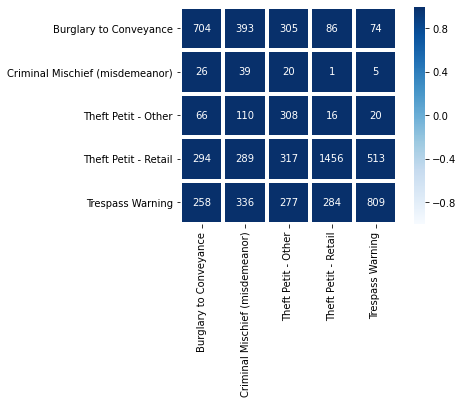

In [19]:
sns.heatmap(cm, vmin=-1, vmax=1, center=0, cmap="Blues", annot = True, fmt="d",
            linewidths=3, linecolor='white',square=True)    

#plt.savefig("seaborn_heatmap_RandomF_confusionmatrix.png")
end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

In [20]:
# "Gini importance" of each feature: the total reduction of error brought by that feature
pd.DataFrame({'feature':X.columns, 'importance':RandomF.feature_importances_}).sort_values(['importance'], ascending=[0])

,feature,importance
0,delay,0.203632
1,Longitude,0.110618
3,Latitude,0.103540
2,2010 Census Tracts,0.096738
4,Offense Hour of Day,0.085261
5,Report Hour of Day,0.079537
6,Florida Census Zip Codes,0.070618
7,Zip Code Boundaries,0.069024
8,Gainesville Police Districts,0.064901
9,Gainesville Fire Response Districts,0.064619


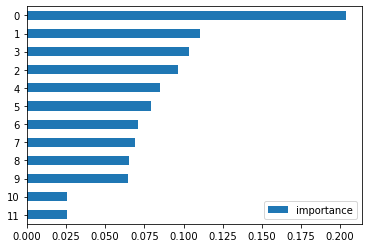

In [21]:
pd.DataFrame({'feature':X.columns, 'importance':RandomF.feature_importances_}).sort_values(['importance']).plot(kind='barh')

Testing Accuarcy of  RandomForest is: 0.473
                                 precision    recall  f1-score   support

         Burglary to Conveyance       0.45      0.52      0.48      1348
Criminal Mischief (misdemeanor)       0.43      0.03      0.06      1167
            Theft Petit - Other       0.59      0.25      0.35      1227
           Theft Petit - Retail       0.51      0.79      0.62      1843
               Trespass Warning       0.41      0.57      0.48      1421

                       accuracy                           0.47      7006
                      macro avg       0.48      0.43      0.40      7006
                   weighted avg       0.48      0.47      0.42      7006

00:11:10.54


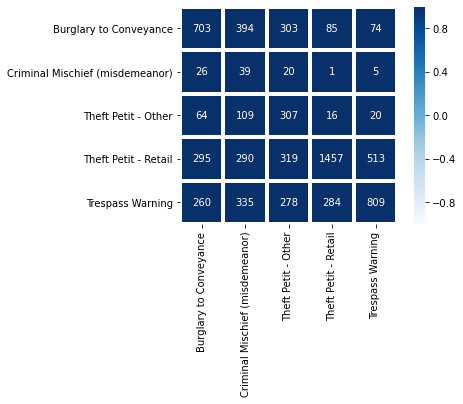

In [16]:
#RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)


from sklearn.ensemble import RandomForestClassifier
start = time.time()
RandomF = RandomForestClassifier(max_depth=5, n_estimators=100000, max_features=1)
RandomF.fit(X_train, Y_train)
RandomF_pred = RandomF.predict(X_test)
confusionMatrix = confusion_matrix(y_true=Y_test, y_pred=RandomF_pred)
cm=pd.DataFrame(confusionMatrix.T, index=RandomF.classes_, columns=RandomF.classes_)

print('Testing Accuarcy of  RandomForest is:', round((np.diagonal(confusionMatrix)).sum()/confusionMatrix.sum(),3))
print(classification_report(y_true=Y_test, y_pred=RandomF_pred))

sns.heatmap(cm, vmin=-1, vmax=1, center=0, cmap="Blues", annot = True, fmt="d",
            linewidths=3, linecolor='white',square=True)         
plt.savefig("seaborn_heatmap_RandomF_confusionmatrix.png")
end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

In [17]:
# "Gini importance" of each feature: the total reduction of error brought by that feature
pd.DataFrame({'feature':X.columns, 'importance':RandomF.feature_importances_}).sort_values(['importance'], ascending=[0])

,feature,importance
0,delay,0.203130
1,Longitude,0.110880
3,Latitude,0.103379
2,2010 Census Tracts,0.096468
4,Offense Hour of Day,0.085240
5,Report Hour of Day,0.080196
6,Florida Census Zip Codes,0.070271
7,Zip Code Boundaries,0.069413
9,Gainesville Fire Response Districts,0.064914
8,Gainesville Police Districts,0.064786


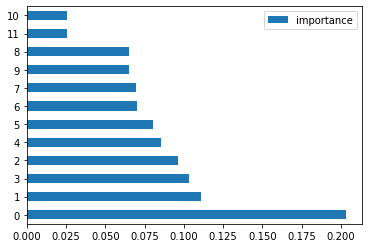

In [18]:
# "Gini importance" of each feature: the total reduction of error brought by that feature
pd.DataFrame({'feature':X.columns, 'importance':RandomF.feature_importances_}).sort_values(['importance'], ascending=[0]).plot(kind='barh')

Misclassified samples: 4402
Accuracy: 0.37
                                 precision    recall  f1-score   support

         Burglary to Conveyance       0.39      0.32      0.35      1348
Criminal Mischief (misdemeanor)       0.29      0.01      0.02      1167
            Theft Petit - Other       0.32      0.21      0.25      1227
           Theft Petit - Retail       0.43      0.71      0.54      1843
               Trespass Warning       0.29      0.41      0.34      1421

                       accuracy                           0.37      7006
                      macro avg       0.34      0.33      0.30      7006
                   weighted avg       0.35      0.37      0.33      7006

00:00:01.42


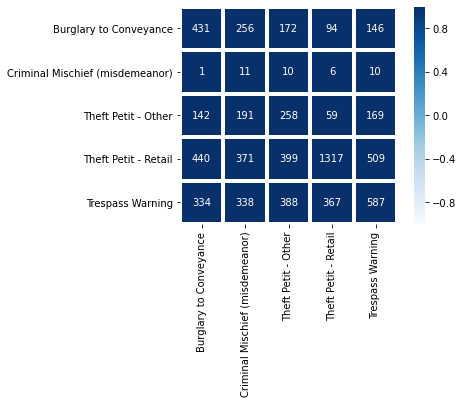

In [14]:
from sklearn.linear_model import LogisticRegression
start = time.time()
Logmodel = LogisticRegression(solver = 'lbfgs',max_iter=10000,multi_class='ovr')
Logmodel.fit(X_train, Y_train)

# use the Logmodel to make predictions with the test data
y_pred = Logmodel.predict(X_test)
# how did our Logmodel perform?
count_misclassified = (Y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(Y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

confusionMatrix = confusion_matrix(Y_test, y_pred)
cm=pd.DataFrame(confusionMatrix.T, index=Logmodel.classes_, columns=Logmodel.classes_)
#print(cm)
print(classification_report(Y_test, y_pred))
sns.heatmap(cm, vmin=-1, vmax=1, center=0, cmap="Blues", annot = True, fmt="d",
            linewidths=3, linecolor='white',square=True)

end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Testing Accuarcy of  QuadraticD is: 0.313
                                 precision    recall  f1-score   support

         Burglary to Conveyance       0.25      0.25      0.25      1348
Criminal Mischief (misdemeanor)       0.17      0.17      0.17      1167
            Theft Petit - Other       0.29      0.16      0.21      1227
           Theft Petit - Retail       0.49      0.41      0.45      1843
               Trespass Warning       0.32      0.48      0.39      1421

                       accuracy                           0.31      7006
                      macro avg       0.30      0.30      0.29      7006
                   weighted avg       0.32      0.31      0.31      7006

00:00:00.30


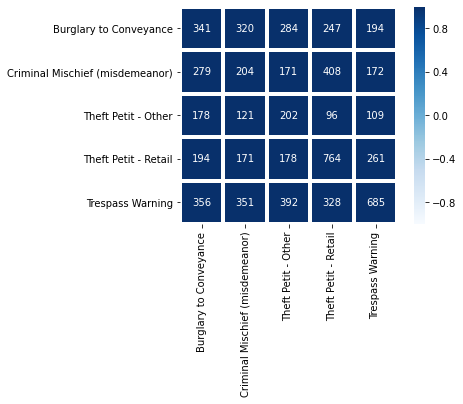

In [15]:
#QuadraticDiscriminantAnalysis()
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
start = time.time()
QuadraticD =QuadraticDiscriminantAnalysis()
QuadraticD.fit(X_train, Y_train)
QuadraticD_pred = QuadraticD.predict(X_test)
confusionMatrix = confusion_matrix(y_true=Y_test, y_pred=QuadraticD_pred)
cm=pd.DataFrame(confusionMatrix.T, index=QuadraticD.classes_, columns=QuadraticD.classes_)

print('Testing Accuarcy of  QuadraticD is:', round((np.diagonal(confusionMatrix)).sum()/confusionMatrix.sum(),3))
print(classification_report(y_true=Y_test, y_pred=QuadraticD_pred))

sns.heatmap(cm, vmin=-1, vmax=1, center=0, cmap="Blues", annot = True, fmt="d",
            linewidths=3, linecolor='white',square=True)         

end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

Testing Accuarcy of  AdaBoost is: 0.519
                                 precision    recall  f1-score   support

         Burglary to Conveyance       0.48      0.52      0.50      1348
Criminal Mischief (misdemeanor)       0.41      0.14      0.21      1167
            Theft Petit - Other       0.50      0.35      0.41      1227
           Theft Petit - Retail       0.64      0.74      0.69      1843
               Trespass Warning       0.45      0.69      0.54      1421

                       accuracy                           0.52      7006
                      macro avg       0.50      0.49      0.47      7006
                   weighted avg       0.51      0.52      0.49      7006

00:00:02.31


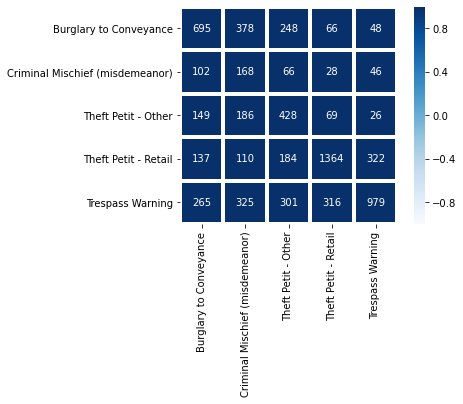

In [16]:
#AdaBoostClassifier()
from sklearn.ensemble import AdaBoostClassifier
start = time.time()
AdaBoost =AdaBoostClassifier()
AdaBoost.fit(X_train, Y_train)
AdaBoost_pred = AdaBoost.predict(X_test)
confusionMatrix = confusion_matrix(y_true=Y_test, y_pred=AdaBoost_pred)
cm=pd.DataFrame(confusionMatrix.T, index=AdaBoost.classes_, columns=AdaBoost.classes_)

print('Testing Accuarcy of  AdaBoost is:', round((np.diagonal(confusionMatrix)).sum()/confusionMatrix.sum(),3))
print(classification_report(y_true=Y_test, y_pred=AdaBoost_pred))

sns.heatmap(cm, vmin=-1, vmax=1, center=0, cmap="Blues", annot = True, fmt="d",
            linewidths=3, linecolor='white',square=True)         

end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

Testing Accuarcy of  SVM is: 0.203
                                 precision    recall  f1-score   support

         Burglary to Conveyance       0.00      0.00      0.00      1348
Criminal Mischief (misdemeanor)       0.00      0.00      0.00      1167
            Theft Petit - Other       0.57      0.00      0.01      1227
           Theft Petit - Retail       0.00      0.00      0.00      1843
               Trespass Warning       0.20      1.00      0.34      1421

                       accuracy                           0.20      7006
                      macro avg       0.15      0.20      0.07      7006
                   weighted avg       0.14      0.20      0.07      7006

00:19:54.39


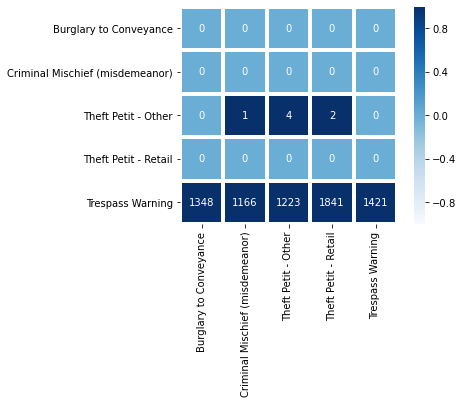

In [17]:
# SVM 
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
start = time.time()
svmmodel1 = OneVsRestClassifier(LinearSVC(random_state=0,max_iter=100000))
svmmodel1.fit(X_train, Y_train)
svmmodel1_pred = svmmodel1.predict(X_test)
confusionMatrix = confusion_matrix(y_true=Y_test, y_pred=svmmodel1_pred)
cm=pd.DataFrame(confusionMatrix.T, index=svmmodel1.classes_, columns=svmmodel1.classes_)
#print(cm)
print('Testing Accuarcy of  SVM is:', round((np.diagonal(confusionMatrix)).sum()/confusionMatrix.sum(),3))
print(classification_report(y_true=Y_test, y_pred=svmmodel1_pred))

sns.heatmap(cm, vmin=-1, vmax=1, center=0, cmap="Blues", annot = True, fmt="d",
            linewidths=3, linecolor='white',square=True)         
plt.savefig("seaborn_heatmap_svm_confusionmatrix.png")
end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

#Implementing Kernel SVM with Scikit-Learn poly

from sklearn.svm import SVC
start = time.time()
svcpoly = SVC(kernel='poly')
svcpoly.fit(X_train, Y_train)
svcpoly_pred = svcpoly.predict(X_test)
confusionMatrix = confusion_matrix(y_true=Y_test, y_pred=svcpoly_pred)
cm=pd.DataFrame(confusionMatrix.T, index=svcpoly.classes_, columns=svcpoly.classes_)

print('Testing Accuarcy of  svcpoly is:', round((np.diagonal(confusionMatrix)).sum()/confusionMatrix.sum(),3))
print(classification_report(y_true=Y_test, y_pred=svcpoly_pred))

sns.heatmap(cm, vmin=-1, vmax=1, center=0, cmap="Blues", annot = True, fmt="d",
            linewidths=3, linecolor='white',square=True)         

end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

In [ ]:
#Implementing Kernel SVM with Scikit-Learn rbf
start = time.time()
svcrbf =SVC(kernel='rbf')
svcrbf.fit(X_train, Y_train)
svcrbf_pred = svcrbf.predict(X_test)
confusionMatrix = confusion_matrix(y_true=Y_test, y_pred=svcrbf_pred)
cm=pd.DataFrame(confusionMatrix.T, index=svcrbf.classes_, columns=svcrbf.classes_)
print('Testing Accuarcy of  svcrbf is:', round((np.diagonal(confusionMatrix)).sum()/confusionMatrix.sum(),3))
print(classification_report(y_true=Y_test, y_pred=svcrbf_pred))
sns.heatmap(cm, vmin=-1, vmax=1, center=0, cmap="Blues", annot = True, fmt="d",
            linewidths=3, linecolor='white',square=True)         
plt.savefig("seaborn_heatmap_svcrbf_confusionmatrix.png")
end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

Testing Accuarcy of  SVM is: 0.551
                                 precision    recall  f1-score   support

         Burglary to Conveyance       0.50      0.54      0.52      1348
Criminal Mischief (misdemeanor)       0.41      0.25      0.31      1167
            Theft Petit - Other       0.49      0.38      0.43      1227
           Theft Petit - Retail       0.73      0.77      0.75      1843
               Trespass Warning       0.49      0.66      0.56      1421

                       accuracy                           0.55      7006
                      macro avg       0.52      0.52      0.52      7006
                   weighted avg       0.54      0.55      0.54      7006

00:00:00.40


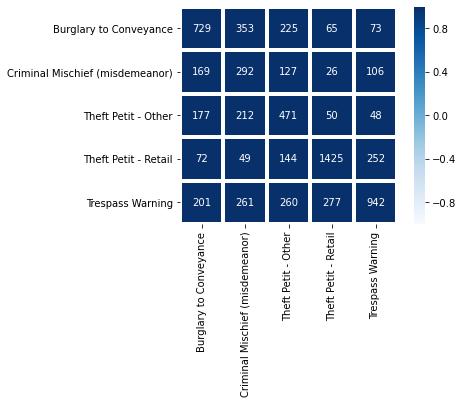

In [9]:
#DecisionTreeClassifier(max_depth=10)
from sklearn.tree import DecisionTreeClassifier
start = time.time()
DecisionTree = DecisionTreeClassifier(max_depth=10)
DecisionTree.fit(X_train, Y_train)
DecisionTree_pred =  DecisionTree.predict(X_test)
confusionMatrix = confusion_matrix(y_true=Y_test, y_pred= DecisionTree_pred)
cm=pd.DataFrame(confusionMatrix.T, index= DecisionTree.classes_, columns= DecisionTree.classes_)
print('Testing Accuarcy of  SVM is:', round((np.diagonal(confusionMatrix)).sum()/confusionMatrix.sum(),3))
print(classification_report(y_true=Y_test, y_pred= DecisionTree_pred))

sns.heatmap(cm, vmin=-1, vmax=1, center=0, cmap="Blues", annot = True, fmt="d",
            linewidths=3, linecolor='white',square=True)         
plt.savefig("seaborn_heatmap_ DecisionTree_confusionmatrix.png")
end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))


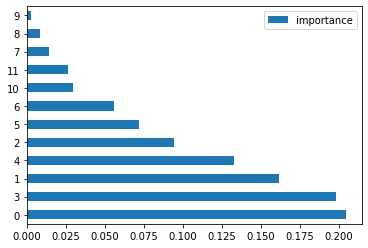

In [10]:
# "Gini importance" of each feature: the total reduction of error brought by that feature
pd.DataFrame({'feature':X.columns, 'importance':DecisionTree.feature_importances_}).sort_values(['importance'], ascending=[0]).plot(kind='barh')

In [11]:
pd.DataFrame({'feature':X.columns, 'importance':DecisionTree.feature_importances_}).sort_values(['importance'], ascending=[0])

,feature,importance
0,delay,0.204216
3,Latitude,0.197912
1,Longitude,0.161402
4,Offense Hour of Day,0.132737
2,2010 Census Tracts,0.094357
5,Report Hour of Day,0.072048
6,Florida Census Zip Codes,0.055789
10,Oyear,0.029637
11,Ryear,0.026487
7,Zip Code Boundaries,0.014368


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


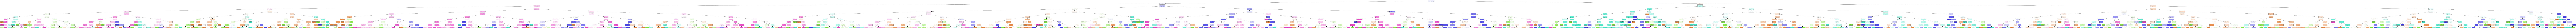

In [12]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 
import os

#os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
dot_data = StringIO()  
export_graphviz(DecisionTree, out_file=dot_data,feature_names=X.columns,filled=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

Testing Accuarcy of  SVM is: 0.203
                                 precision    recall  f1-score   support

         Burglary to Conveyance       0.00      0.00      0.00      1348
Criminal Mischief (misdemeanor)       0.00      0.00      0.00      1167
            Theft Petit - Other       0.00      0.00      0.00      1227
           Theft Petit - Retail       0.00      0.00      0.00      1843
               Trespass Warning       0.20      1.00      0.34      1421

                       accuracy                           0.20      7006
                      macro avg       0.04      0.20      0.07      7006
                   weighted avg       0.04      0.20      0.07      7006

00:00:00.32

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


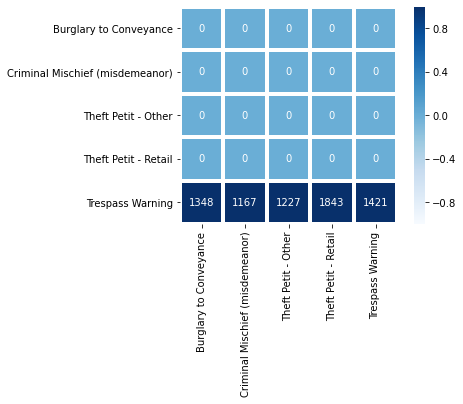

In [13]:
# Neural Network
from sklearn import neural_network
start = time.time()
neuralnetwork = neural_network.MLPClassifier(solver= 'lbfgs', hidden_layer_sizes=(5, 2), random_state=123)
neuralnetwork.fit(X_train, Y_train)
neuralnetwork_pred =  neuralnetwork.predict(X_test)
confusionMatrix = confusion_matrix(y_true=Y_test, y_pred= neuralnetwork_pred)
cm=pd.DataFrame(confusionMatrix.T, index= neuralnetwork.classes_, columns= neuralnetwork.classes_)

print('Testing Accuarcy of  SVM is:', round((np.diagonal(confusionMatrix)).sum()/confusionMatrix.sum(),3))
print(classification_report(y_true=Y_test, y_pred= neuralnetwork_pred))

sns.heatmap(cm, vmin=-1, vmax=1, center=0, cmap="Blues", annot = True, fmt="d",
            linewidths=3, linecolor='white',square=True)         
#plt.savefig("seaborn_heatmap_ neuralnetwork_confusionmatrix.png")
end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))


Testing Accuarcy of  SVM is: 0.362
                                 precision    recall  f1-score   support

         Burglary to Conveyance       0.34      0.40      0.37      1348
Criminal Mischief (misdemeanor)       0.25      0.28      0.26      1167
            Theft Petit - Other       0.73      0.03      0.05      1227
           Theft Petit - Retail       0.50      0.59      0.54      1843
               Trespass Warning       0.29      0.38      0.33      1421

                       accuracy                           0.36      7006
                      macro avg       0.42      0.34      0.31      7006
                   weighted avg       0.42      0.36      0.33      7006

00:00:00.24


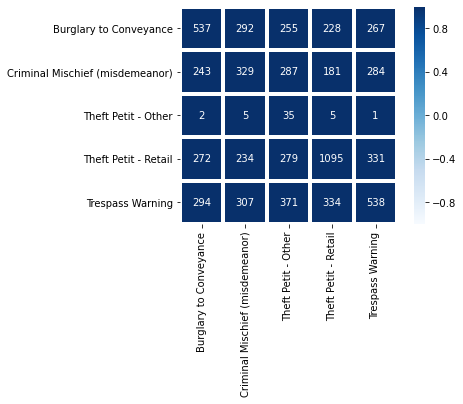

In [14]:
# Naive Bayes
from sklearn import naive_bayes
start = time.time()
naivebayes = naive_bayes.GaussianNB()
naivebayes.fit(X_train, Y_train)
naivebayes_pred =  naivebayes.predict(X_test)
confusionMatrix = confusion_matrix(y_true=Y_test, y_pred= naivebayes_pred)
cm=pd.DataFrame(confusionMatrix.T, index= naivebayes.classes_, columns= naivebayes.classes_)

print('Testing Accuarcy of  SVM is:', round((np.diagonal(confusionMatrix)).sum()/confusionMatrix.sum(),3))
print(classification_report(y_true=Y_test, y_pred= naivebayes_pred))

sns.heatmap(cm, vmin=-1, vmax=1, center=0, cmap="Blues", annot = True, fmt="d",
            linewidths=3, linecolor='white',square=True)         

end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

Testing Accuarcy of  SVM is: 0.517
                                 precision    recall  f1-score   support

         Burglary to Conveyance       0.49      0.50      0.50      1348
Criminal Mischief (misdemeanor)       0.36      0.19      0.25      1167
            Theft Petit - Other       0.50      0.34      0.40      1227
           Theft Petit - Retail       0.62      0.76      0.69      1843
               Trespass Warning       0.47      0.63      0.54      1421

                       accuracy                           0.52      7006
                      macro avg       0.49      0.48      0.47      7006
                   weighted avg       0.50      0.52      0.50      7006

00:00:01.21


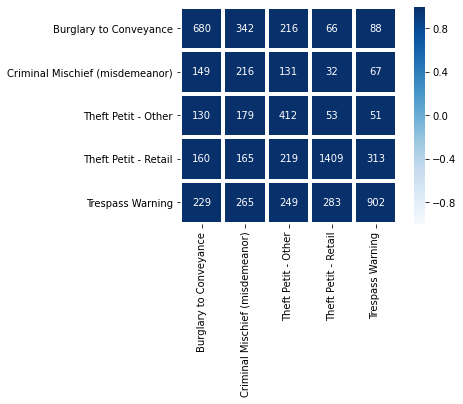

In [16]:
# KNN
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
start = time.time()
KNeighbors = neighbors.KNeighborsClassifier(20)
KNeighbors.fit(X_train, Y_train)
KNeighbors_pred =  KNeighbors.predict(X_test)
confusionMatrix = confusion_matrix(y_true=Y_test, y_pred= KNeighbors_pred)
cm=pd.DataFrame(confusionMatrix.T, index= KNeighbors.classes_, columns= KNeighbors.classes_)

print('Testing Accuarcy of  SVM is:', round((np.diagonal(confusionMatrix)).sum()/confusionMatrix.sum(),3))
print(classification_report(y_true=Y_test, y_pred= KNeighbors_pred))

sns.heatmap(cm, vmin=-1, vmax=1, center=0, cmap="Blues", annot = True, fmt="d",
            linewidths=3, linecolor='white',square=True)         
#plt.savefig("seaborn_heatmap_ KNeighbors_confusionmatrix.png")
end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))